## **Predicting Continuous Target Variables with Regression Analysis**


**Regression models** are used to predict target variables on a continuous scale, which makes them attractive for addressing many questions in science. They also have applications in industry, such as understanding relationships between variables, evaluating trends, or making forecasts. One example
is predicting the sales of a company in future months.

In this chapter, we will discuss the main concepts of regression models and cover the following topics:
- Exploring and visualizing datasets
- Looking at different approaches to implementing linear regression models
- Training regression models that are robust to outliers
- Evaluating regression models and diagnosing common problems
- Fitting regression models to nonlinear data


#### **Introducing linear regression**
The goal of linear regression is to model the relationship between one or multiple features and a continuous target variable. In contrast to classification—a different subcategory of supervised learning—
regression analysis aims to predict outputs on a continuous scale rather than categorical class labels.

#### **Simple linear regression**
The goal of simple (univariate) linear regression is to model the relationship between a single feature (explanatory variable, x) and a continuous-valued target (response variable, y). The equation of a linear model with one explanatory variable is defined as follows:

<div align="center"> y = w<sub>1</sub> + b


Here, the parameter (bias unit), b, represents the y axis intercept and w<sub>1</sub> is the weight coefficient of the explanatory variable. Our goal is to learn the weights of the linear equation to describe the relationship between the explanatory variable and the target variable, which can then be used to predict the responses of new explanatory variables that were not part of the training dataset.

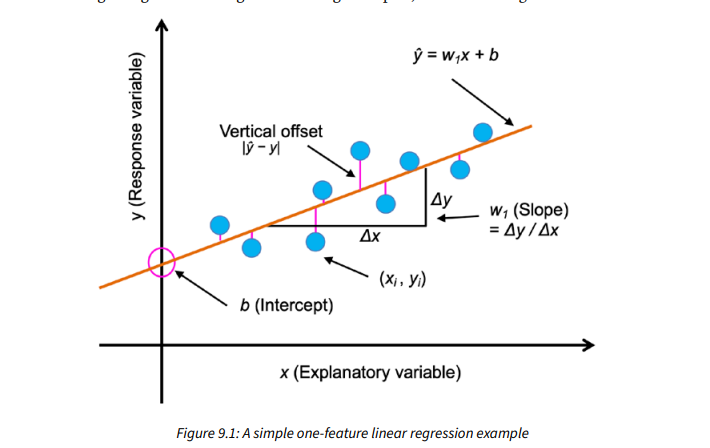

#### **Multiple linear regression**

we can also generalize the linear regression model to multiple explanatory variables; this process is called **multiple linear regression**

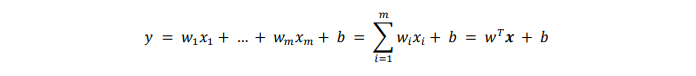

Interactive plot can be found here: [3D Regression](https://miabellaai.net/regression.html)

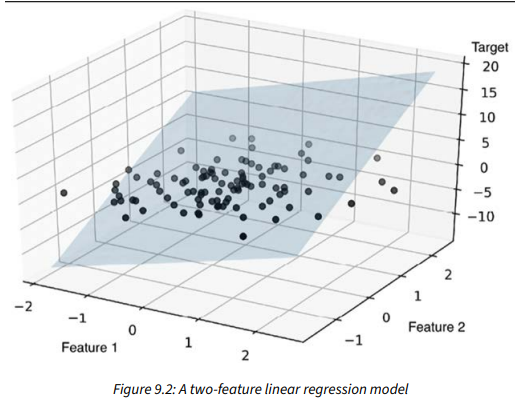

#### **Exploring the Ames Housing dataset**


 Ames Housing dataset, which contains information about individual residential property in Ames, Iowa, from 2006
to 2010. The dataset was collected by Dean De Cock in 2011, and additional information is available via the following links:
- A report describing the dataset: http://jse.amstat.org/v19n3/decock.pdf
- Detailed documentation regarding the dataset’s features: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
- The dataset in a tab-separated format: http://jse.amstat.org/v19n3/decock/AmesHousing.txt

#### **Loading the Ames Housing dataset into a DataFrame**

The Ames Housing dataset consists of 2,930 examples and 80 features. For simplicity, we will only work with a subset of the features, shown in the following list.


The features we will be working with, including the target variable, are as follows:
- Overall Qual: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excellent)
- Overall Cond: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excellent)
- Gr Liv Area: Above grade (ground) living area in square feet
- Central Air: Central air conditioning (N=no, Y=yes)
- Total Bsmt SF: Total square feet of the basement area
- SalePrice: Sale price in U.S. dollars ($)


We will regard the sale price (SalePrice) as our target variable—the variable that we want to predict using one or more of the five explanatory variables:

In [64]:
import pandas as pd
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                  sep='\t',
                  usecols=columns)
df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [65]:
# dimension
df.shape

(2930, 6)

Take care of is the 'Central Air' variable, which is encoded as type string

In [66]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

Lastly, let’s check whether any of the data frame columns contain missing values:

In [67]:
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

As we can see, the Total Bsmt SF feature variable contains one missing value.

In [68]:
df = df.dropna(axis=0)
df.isnull().sum()

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64

#### **Visualizing the important characteristics of a dataset**

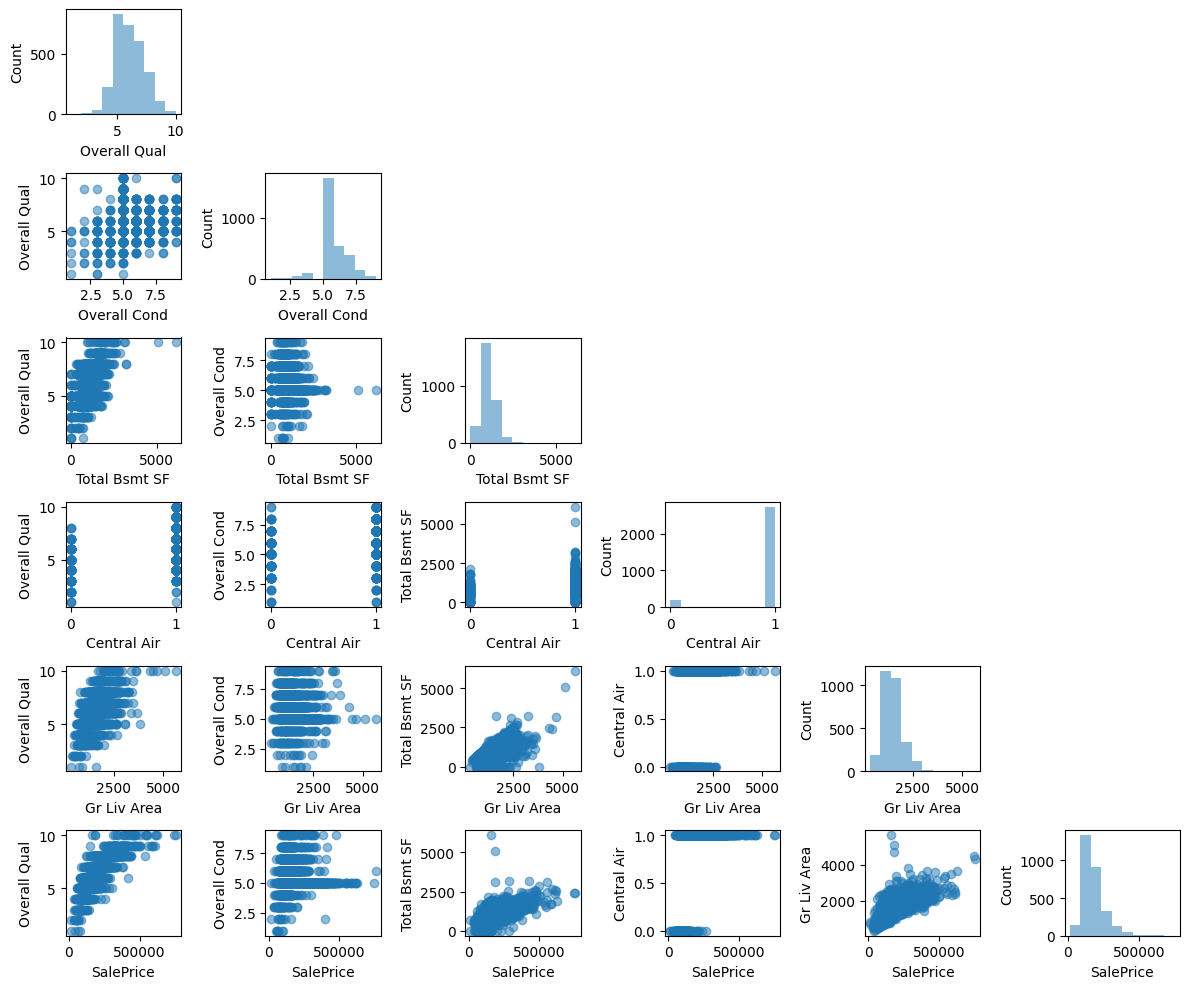

In [69]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(df.values, figsize=(12,10),
                   names=df.columns, alpha=0.5)
plt.tight_layout()
plt.show()

#### **Looking at relationships using a correlation matrix**

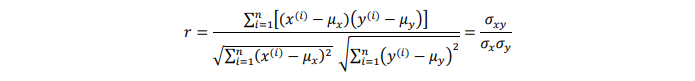

plot the correlation matrix array as a heat map:

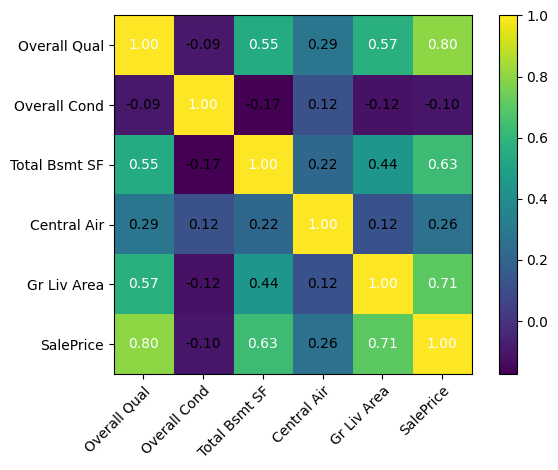

In [70]:
import numpy as np
from mlxtend.plotting import heatmap

cm = np.corrcoef(df.values.T)
hm = heatmap(cm, row_names=df.columns, column_names=df.columns)
plt.tight_layout()
plt.show()

#### **Implementing an ordinary least squares linear regression model**

The **ordinary least squares (OLS)** method (sometimes also called **linear least squares**) to estimate the parameters of the linear regression line that minimizes the sum of the squared vertical distances (residuals or errors) to the training examples.

#### **Solving regression for regression parameters with gradient descent**

**Adaptive Linear Neuron (Adaline)**

s loss function in Adaline is the **mean squared error (MSE)**, which is identical to the loss function that we use for OLS


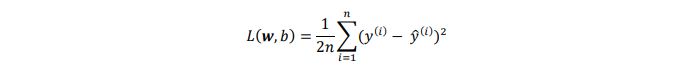

In [71]:
class LinearRegressionGD:
      def __init__(self, eta=0.01, n_iter=50, random_state=1):
             self.eta = eta
             self.n_iter = n_iter
             self.random_state = random_state

      def fit(self, X, y):
              rgen = np.random.RandomState(self.random_state)
              self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
              self.b_ = np.array([0.])
              self.losses_ = []

              for i in range(self.n_iter):
                    output = self.net_input(X)
                    errors = (y - output)
                    self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
                    self.b_ += self.eta * 2.0 * errors.mean()
                    loss = (errors**2).mean()
                    self.losses_.append(loss)
              return self

      def net_input(self, X):
             return np.dot(X, self.w_) + self.b_

      def predict(self, X):
             return self.net_input(X)


To see our LinearRegressionGD regressor in action, let’s use the Gr Living Area (size of the living area above ground in square feet) feature from the Ames Housing dataset as the explanatory variable and train a model that can predict SalePrice.

In [72]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

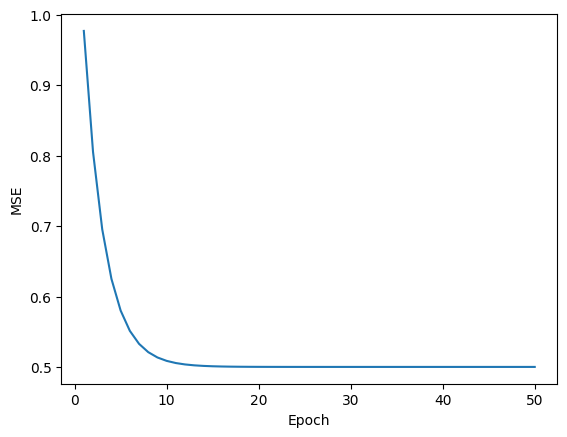

In [73]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.show()

let’s visualize how well the linear regression line fits the training data.

In [74]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

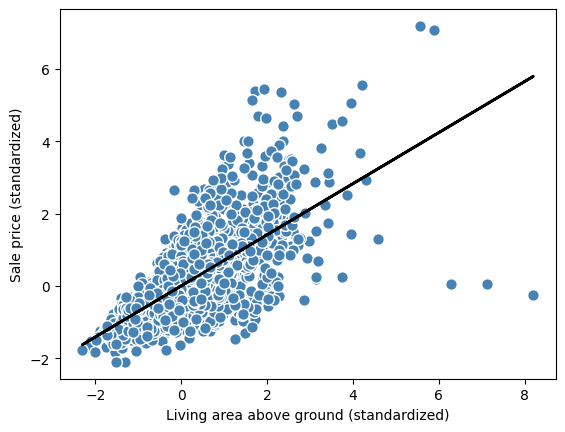

In [75]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

plt.show()

To scale the predicted price back onto the original price in U.S. dollars scale, we can
simply apply the inverse_transform method of StandardScaler:

In [76]:
feature_std = sc_x.transform(np.array([[2500]]))
target_std = lr.predict(feature_std)
target_reverted = sc_y.inverse_transform(target_std.reshape(-1, 1))
print(f'Sale price: ${target_reverted.flatten()[0]:.2f}')

Sale price: $292507.07


In [77]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


#### **Estimating the coefficient of a regression model via scikit-learn**

The linear regression implementation in scikit-learn also works (better) with unstandardized variables, since it does not use (S)GD-based optimization, so we can skip the standardization step

In [78]:
from sklearn.linear_model import LinearRegression

In [79]:
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


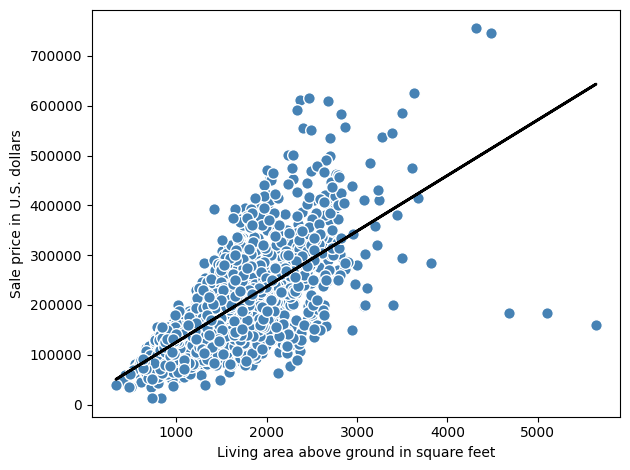

In [80]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
plt.show()

**Normal Equations** alternative:

In [81]:
# adding a column vector of "ones"
Xb = np.hstack((np.ones((X.shape[0], 1)), X))
w = np.zeros(X.shape[1])
z = np.linalg.inv(np.dot(Xb.T, Xb))
w = np.dot(z, np.dot(Xb.T, y))

print(f'Slope: {w[1]:.3f}')
print(f'Intercept: {w[0]:.3f}')

Slope: 111.666
Intercept: 13342.979


#### **Fitting a robust regression model using RANSAC**

**RANdom SAmple Consensus (RANSAC)** algorithm, which fits a regression model to a subset of the data, the so-called **inliers**.

We can summarize the iterative RANSAC algorithm as follows:
 1. Select a random number of examples to be inliers and fit the model.

 2. Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.

 3. Refit the model using all inliers.

 4. Estimate the error of the fitted model versus the inliers.

 5. Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations was reached; go back to step 1 otherwise.



**RANSAC** algorithm as implemented in scikit-learn’s RANSACRegressor class:

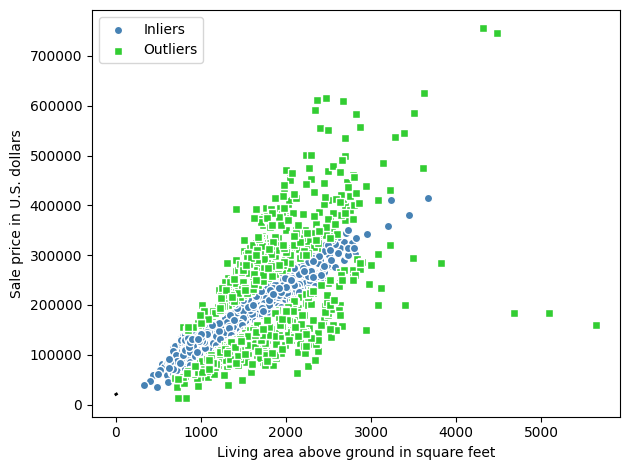

In [82]:
from sklearn.linear_model import RANSACRegressor


ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=None, # default
                         random_state=123)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

When we print the slope and intercept of the model by executing the following code, the linear regression line will be slightly different from the fit that we obtained in the previous section without
using RANSAC:

In [83]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 106.348
Intercept: 20190.093


Remember that we set the residual_threshold parameter to None, so RANSAC was using the MAD to compute the threshold for flagging inliers and outliers. The MAD, for this dataset, can be computed
as follows:

In [84]:
def median_absolute_deviation(data):
    return np.median(np.abs(data - np.median(data)))

median_absolute_deviation(y)

37000.0

So, if we want to identify fewer data points as outliers, we can choose a residual_threshold value greater than the preceding MAD. For example, Figure 9.10 shows the inliers and outliers of a RANSAC linear regression model with a residual threshold of 65,000:

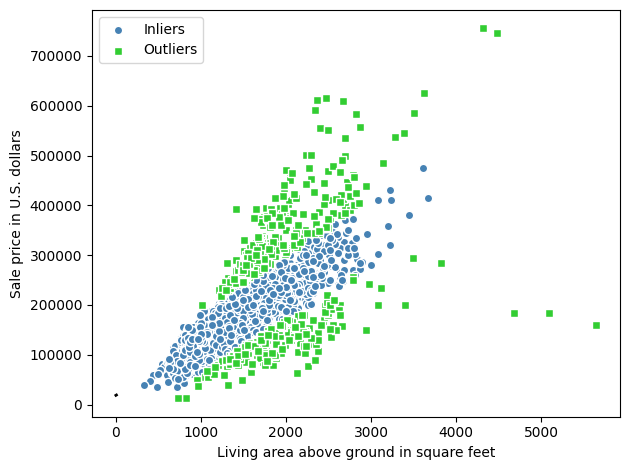

In [85]:
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # default
                         min_samples=0.95,
                         loss='absolute_error', # default
                         residual_threshold=65000, # default
                         random_state=123)

ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [86]:
print(f'Slope: {ransac.estimator_.coef_[0]:.3f}')
print(f'Intercept: {ransac.estimator_.intercept_:.3f}')

Slope: 105.631
Intercept: 18314.587


Using RANSAC, we reduced the potential effect of the outliers in this dataset, but we don’t know whether
this approach will have a positive effect on the predictive performance for unseen data or not. Thus,
in the next section, we will look at different approaches for evaluating a regression model, which is
a crucial part of building systems for predictive modeling.

### **Evaluating the performance of linear regression models**

It is crucial to test the model on data that it hasn’t seen during
training to obtain a more unbiased estimate of its generalization performance.

In [87]:
from sklearn.model_selection import train_test_split


target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [88]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

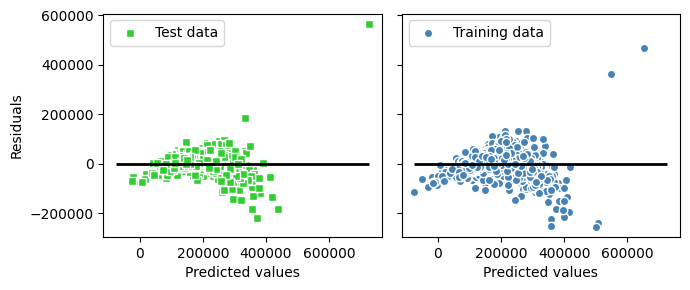

In [89]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
    ax.set_xlabel('Predicted values')
    ax.legend(loc='upper left')
    ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100, color='black', lw=2)

plt.tight_layout()
plt.show()

Since our model uses multiple explanatory variables, we can’t visualize the linear regression line (or hyperplane, to be precise) in a two-dimensional plot, but we can plot the residuals (the differences or vertical distances between the actual and predicted values) versus the predicted values to diagnose our regression model. Residual plots are a commonly used graphical tool for diagnosing regression models. They can help to detect nonlinearity and outliers and check whether the errors are randomly
distributed.


Using the following code, we will now plot a residual plot where we simply subtract the true target variables from our predicted responses:

**Note:**
- In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect the errors to be randomly distributed and the residuals to be randomly scattered around the centerline. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which has leaked into the residuals, as you can see to a degree in our previous residual plot. Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

**Mean square error:**
- Another useful quantitative measure of a model’s performance is the **mean squared error (MSE)** that we discussed earlier as our loss function that we minimized to fit the linear regression model. The
following is a version of the MSE without the 1/2 scaling factor that is often used to simplify the loss
derivative in gradient descent:

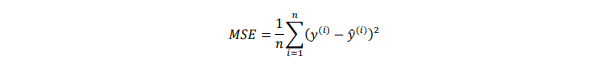

- Similar to prediction accuracy in classification contexts, we can use the MSE for cross-validation and model selection as discussed in Chapter 6.

- Like classification accuracy, MSE also normalizes according to the sample size, n. This makes it possible to compare across different sample sizes (for example, in the context of learning curves) as well

Let’s now compute the MSE of our training and test predictions:

In [90]:
from sklearn.metrics import mean_squared_error


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# MSE test on training and test dataset
if mse_test > mse_train:
  print(f"The mse of the test dataset is higher than the training\n which signals high-variance(overfitting)\n\n")

print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

The mse of the test dataset is higher than the training
 which signals high-variance(overfitting)


MSE train: 1497216245.85
MSE test: 1516565821.00



**Mean absolute error:**
Note that it can be more intuitive to
show the error on the original unit scale (here, dollar instead of dollar-squared), which is why we may choose to compute the square root of the MSE, called root mean squared error, or the **mean absolute  error (MAE)**, which emphasizes incorrect prediction slightly less:

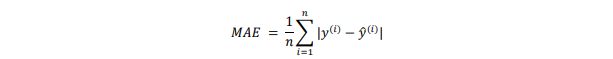

We can compute the MAE similar to the MSE:

In [91]:
from sklearn.metrics import mean_absolute_error


mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# MAE test on training and test dataset
print("Based on the test set MAE, we can say that the model\n\
makes an error of approximately $25,000 on average\n\n")


print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

Based on the test set MAE, we can say that the model
makes an error of approximately $25,000 on average


MAE train: 25983.03
MAE test: 24921.29


When we use the MAE or MSE for comparing models, we need to be aware that these are unbounded in contrast to the classification accuracy, for example. In other words, the interpretations of the MAE and MSE depend on the dataset and feature scaling. For example, if the sale prices were presented as multiples of 1,000 (with the K suffix), the same model would yield a lower MAE compared to a model  that worked with unscaled features. To further illustrate this point,

image.png

**Coefficient of determination (R<sup>2</sup>)**

standardized version of the MSE, for better interpretability of the model’s performance. Or, in other words, R<sup>2</sup> is the fraction of response variance that is captured by the model. The
R<sup>2</sup>
 value is defined as:

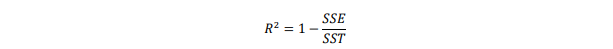

Here, SSE is the sum of squared errors, which is similar to the MSE but does not include the normalization by sample size n:

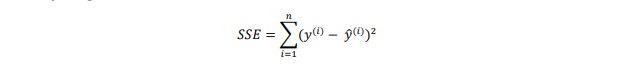

And SST is the total sum of squares:

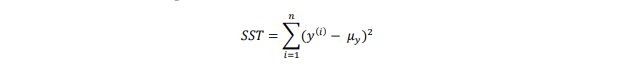

In other words, SST is simply the variance of the response.

Now, let’s briefly show that R<sup>2</sup> is indeed just a rescaled version of the MSE:

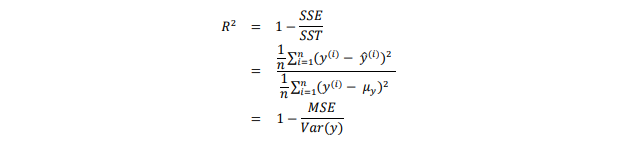

or the training dataset, R<sup>2</sup>
 is bounded between 0 and 1, but it can become negative for the test dataset.
A negative R<sup>2</sup> means that the regression model fits the data worse than a horizontal line representing the sample mean. (In practice, this often happens in the case of extreme overfitting, or if we forget to scale the test set in the same manner we scaled the training set.) If R<sup>2</sup>= 1, the model fits the data perfectly with a corresponding MSE = 0.


**Evaluated on the training data**, the R<sup>2</sup> of our model is 0.77, which isn’t great but also not too bad given that we only work with a small set of features. However, the R<sup>2</sup> on the **test dataset** is only slightly smaller, at 0.75, which indicates that the model is only overfitting slightly:

In [92]:
from sklearn.metrics import r2_score


r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.77
R^2 test: 0.75


#### **Using regularized methods for regression**

regularization
is one approach to tackling the problem of overfitting by adding additional information and thereby
shrinking the parameter values of the model to induce a penalty against complexity. The most popular approaches to regularized linear regression are the so-called
- ridge regression
- least absolute shrinkage and selection operator (LASSO)
- elastic net.

**Ridge regression** is an L2 penalized model where we simply add the squared sum of the weights to the MSE loss function:

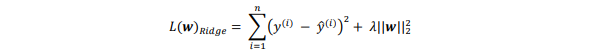

Here, the L2 term is defined as follows:

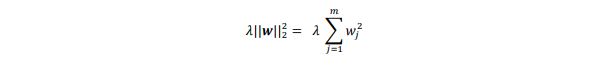

**Note** increasing the value of hyperparameter 𝜆(alpha), we increase the regularization strength and thereby shrink the weights of our model.

An alternative approach that can lead to sparse models is **LASSO**. Depending on the regularization strength, certain weights can become zero, which also makes **LASSO** useful as a supervised feature
selection technique:

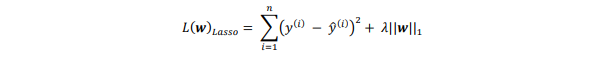

Here, the L1 penalty for LASSO is defined as the sum of the absolute magnitudes of the model weights,
as follows:

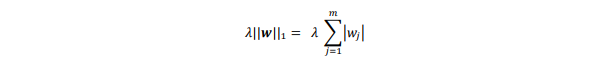

**Con of Lasso:**
- A limitation of LASSO is that it selects at most n features if m > n, where n is the number of
training examples. This may be undesirable in certain applications of feature selection.

**Pros of Lasso:**
- In practice, however, this property of LASSO is often an advantage because it avoids saturated models.

  - **The saturation:** of a model occurs if the number of training examples is equal to the number of features, which is
a form of overparameterization. As a consequence, a saturated model can always fit the training data perfectly but is merely a form of interpolation and thus is not expected to generalize well.


### **Elastic net:**
A compromise between ridge regression and LASSO is elastic net, which has an L1 penalty to generate sparsity and an L2 penalty such that it can be used for selecting more than n features if m > n:

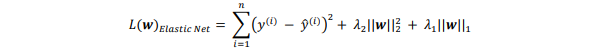

A ridge regression model can be initialized via:

In [93]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

Note that the regularization strength is regulated by the parameter alpha, which is similar to the parameter 𝜆. Likewise, we can initialize a LASSO regressor from the linear_model submodule:

In [94]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)

Lastly, the ElasticNet implementation allows us to vary the L1 to L2 ratio:

In [95]:
from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5)

**Note:** , if we set l1_ratio to 1.0, the ElasticNet regressor would be equal to LASSO regression.

### **Turning a linear regression model into a curve – polynomial regression**

One way to account for the violation of linearity assumption is to use a polynomial regression model by adding polynomial terms:

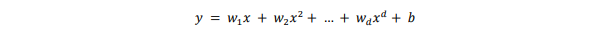

**Adding polynomial terms using scikit-learn**

We will now learn how to use the PolynomialFeatures transformer class from scikit-learn to add a quadratic term (d = 2) to a simple regression problem with one explanatory variable. Then, we will compare the polynomial to the linear fit by following these steps:


1. Add a second-degree polynomial term:

In [96]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([258.0, 270.0, 294.0,
              320.0, 342.0, 368.0,
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8,
              298.6, 314.2, 342.2,
              360.8, 368.0, 391.2,
              390.8])
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

2. Fit a simple linear regression model for comparison:

In [97]:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

3. Fit a multiple regression model on the transformed features for polynomial regression:

In [98]:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

4. Plot the results:

In the resulting plot, you can see that the polynomial fit captures the relationship
between the response and explanatory variables much better than the
linear fit:




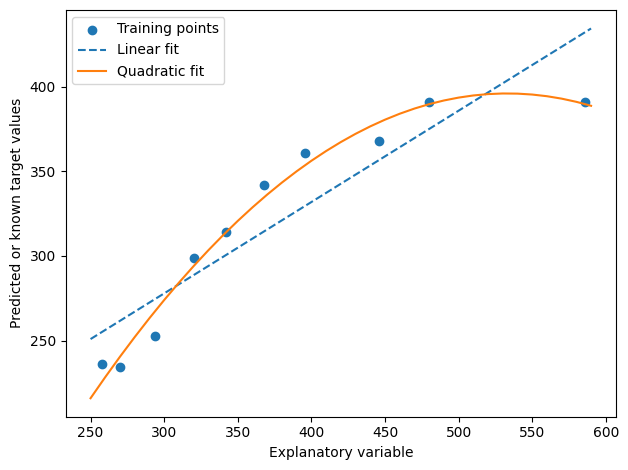

In [99]:
print("In the resulting plot, you can see that the polynomial fit captures the relationship\n\
between the response and explanatory variables much better than the\n\
linear fit:\n\n")

plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit,
         label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit,
        label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Next, we will compute the MSE and R<sup>2</sup> evaluation metrics:

In [100]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

# mean square error
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

print(f'Training MSE linear: {mse_lin:.3f}'
      f', quadratic: {mse_quad:.3f}')

# r2 of the linear and quad
r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)
print(f'Training R^2 linear: {r2_lin:.3f}'
      f', quadratic: {r2_quad:.3f}')

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


As you can see after executing the code, the MSE decreased from 570 (linear fit) to 61 (quadratic fit); also, the coefficient of determination reflects a closer fit of the quadratic model (R<sup>2</sup>= 0.982) as opposed to the linear fit (R<sup>2</sup> = 0.832) in this particular toy problem.


#### **Modeling nonlinear relationships in the Ames Housing dataset**

 By executing the following code, we will model the relationship
between sale prices and the living area above ground using second-degree (quadratic) and third-degree
(cubic) polynomials and compare that to a linear fit.
We start by removing the three outliers with a living area greater than 4,000 square feet, which we
can see in previous figures, such as in Figure 9.8, so that these outliers don’t skew our regression fits:

In [101]:
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values
X = X[(df['Gr Liv Area'] < 4000)]
y = y[(df['Gr Liv Area'] < 4000)]

Next, we fit the regression models:

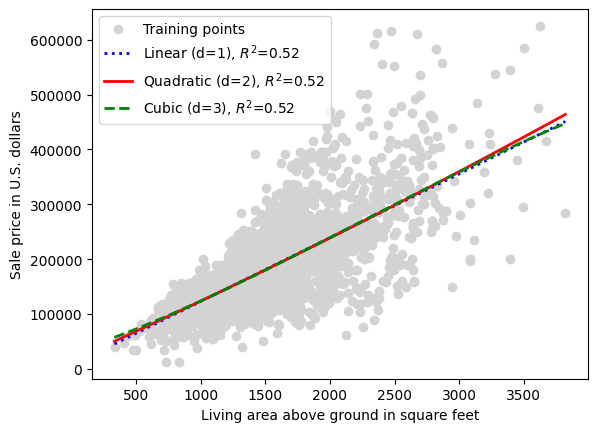

In [102]:
regr = LinearRegression()


# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')
plt.plot(X_fit, y_quad_fit,
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red',
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

**Interpretation:**
As we can see, using quadratic or cubic features does not really have an effect. That’s because the
relationship between the two variables appears to be linear. So, let’s take a look at another feature,
namely, Overall Qual. The Overall Qual variable rates the overall quality of the material and finish
of the houses and is given on a scale from 1 to 10, where 10 is best:

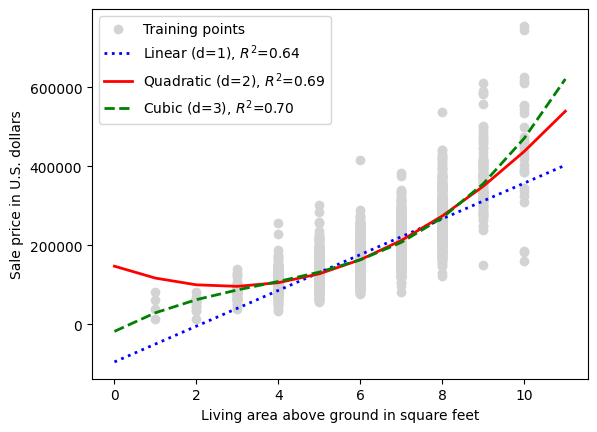

In [103]:
## Using the Overall Qual feature
X = df[['Overall Qual']].values
y = df['SalePrice'].values



regr = LinearRegression()


# create quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit to features
X_fit = np.arange(X.min()-1, X.max()+2, 1)[:, np.newaxis]
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

# plot results
plt.scatter(X, y, label='Training points', color='lightgray')
plt.plot(X_fit, y_lin_fit,
         label=f'Linear (d=1), $R^2$={linear_r2:.2f}',
         color='blue',
         lw=2,
         linestyle=':')
plt.plot(X_fit, y_quad_fit,
         label=f'Quadratic (d=2), $R^2$={quadratic_r2:.2f}',
         color='red',
         lw=2,
         linestyle='-')
plt.plot(X_fit, y_cubic_fit,
         label=f'Cubic (d=3), $R^2$={cubic_r2:.2f}',
         color='green',
         lw=2,
         linestyle='--')
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.legend(loc='upper left')
plt.show()

**Interpretation:**As you can see, the quadratic and cubic fits capture the relationship between sale prices and the overall quality of the house better than the linear fit. However, you should be aware that adding more and more polynomial features increases the complexity of a model and therefore increases the chance of
overfitting. Thus, in practice, it is always recommended to evaluate the performance of the model on a separate test dataset to estimate the generalization performance.

#### **Dealing with nonlinear relationships using random forests**


A **random forest** which is an ensemble of multiple decision trees, can be understood as the sum of piecewise linear functions, in contrast to the global
linear and polynomial regression models that we discussed previously. In other words, via the decision tree algorithm, we subdivide the input space into smaller regions that become more manageable.


**Decision tree regression**

n advantage of the decision tree algorithm is that it works with arbitrary features and does not require any transformation of the features if we are dealing with nonlinear data because decision trees
analyze one feature at a time, rather than taking weighted combinations into account. (Likewise, normalizing or standardizing features is not required for decision trees.)

To use a decision tree for regression, however, we need an impurity metric that is suitable for continuous
variables, so we define the impurity measure of a node, t, as the MSE instead:

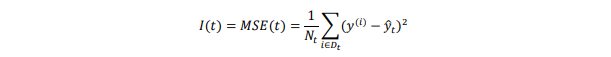

In the context of decision tree regression, the MSE is often referred to as **within-node variance**, which is why the splitting criterion is also better known as **variance reduction**.

**DecisionTreeRegressor**

let’s use the **DecisionTreeRegressor** implemented in scikit-learn to model the relationship between the SalePrice and Gr Living Area variables. Note that SalePrice and Gr Living Area do not necessarily represent a nonlinear relationship, but this feature combination still demonstrates the general aspects of a regression tree quite nicely:

As you can see in the resulting plot, the decision tree captures the
 general trend in the data. And we can imagine that a regression tree could
 also capture trends in nonlinear data relatively well. However, a limitation
 of this model is that it does not capture the continuity and differentiability
 of the desired prediction. In addition, we need to be careful about choosing an
 appropriate value for the depth of the tree so as to not overfit or underfit the
 data; here, a depth of three seemed to be a good choice.




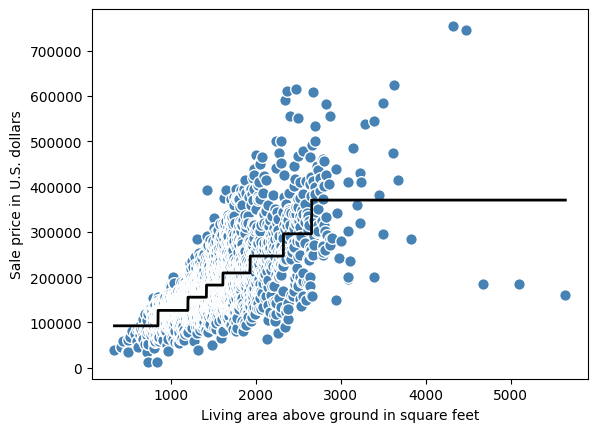

In [104]:
# import
from sklearn.tree import DecisionTreeRegressor
# features
X = df[['Gr Liv Area']].values
# target
y = df['SalePrice'].values

# the model
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], tree)

print("As you can see in the resulting plot, the decision tree captures the\n\
 general trend in the data. And we can imagine that a regression tree could\n\
 also capture trends in nonlinear data relatively well. However, a limitation\n\
 of this model is that it does not capture the continuity and differentiability\n\
 of the desired prediction. In addition, we need to be careful about choosing an\n\
 appropriate value for the depth of the tree so as to not overfit or underfit the\n\
 data; here, a depth of three seemed to be a good choice.\n\n")

# the plot
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')
plt.show()

As you can see in the resulting plot, the decision tree captures the general trend in the data. And we
can imagine that a regression tree could also capture trends in nonlinear data relatively well. However,
a limitation of this model is that it does not capture the continuity and differentiability of the desired
prediction. In addition, we need to be careful about choosing an appropriate value for the depth of
the tree so as to not overfit or underfit the data; here, a depth of three seemed to be a good choice.

### **Random forest regression:**

**The random forest algorithm:** is an ensemble technique that combines
multiple decision trees.

- A random forest usually has a better generalization performance than an
individual decision tree due to randomness, which helps to decrease the model’s variance.

- Other advantages of random forests are that they are less sensitive to outliers in the dataset and don’t require
much parameter tuning.
- The only parameter in random forests that we typically need to experiment with is the number of trees in the ensemble.

- The basic random forest algorithm for regression is almost identical to the random forest algorithm.

- The only difference is that we use the **MSE criterion** to grow the individual decision trees, and the predicted
target variable is calculated as the average prediction across all decision trees.



#### **Implementation:**

Now, let’s use all the features in the Ames Housing dataset to fit a random forest regression model on
70 percent of the examples and evaluate its performance on the remaining 30 percent, as we have done previously in the <i>Evaluating the performance of linear regression models</i> section. The code is as follows:

In [108]:
target = 'SalePrice'
features = df.columns[df.columns != target]
X = df[features].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)

In [110]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(
    n_estimators=1000,
     criterion='squared_error',
     random_state=1,
     n_jobs=-1)

In [111]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [112]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 8305.18
MAE test: 20821.77


In [113]:
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 0.98
R^2 test: 0.85


Unfortunately, you can see that the random forest tends to overfit the training data. However, it’s still able to explain the relationship between the target and explanatory variables relatively well (𝑅<sup>2</sup> = 0.85
on the test dataset). For comparison, the linear model from the previous section, Evaluating the performance of linear regression models, which was fit to the same dataset, was overfitting less but performed worse on the test set (𝑅<sup>2</sup> = 0.75).

Lastly, let’s also take a look at the residuals of the prediction:

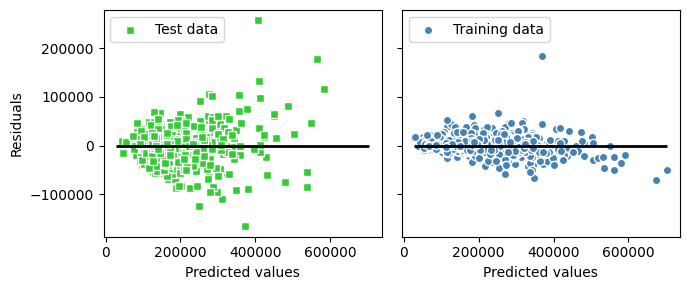

In [114]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')

ax2.scatter(y_train_pred, y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
ax1.set_ylabel('Residuals')

for ax in (ax1, ax2):
            ax.set_xlabel('Predicted values')
            ax.legend(loc='upper left')
            ax.hlines(y=0, xmin=x_min-100, xmax=x_max+100,
            color='black', lw=2)
plt.tight_layout()
plt.show()

As it was already summarized by the R<sup>2</sup> coefficient, you can see that the model fits the training data better than the test data, as indicated by the outliers in the y axis direction. Also, the distribution of the residuals does not seem to be completely random around the zero center point, indicating that the model is not able to capture all the exploratory information. However, the residual plot indicates a large improvement over the residual plot of the linear model that we plotted earlier in this chapter.

**Note:**
Ideally, our model error should be
- random or unpredictable. In other words, the error of the predictions should not be related to any of the information contained in the explanatory variables; rather, it should reflect the randomness of the real-world distributions or patterns. If we find patterns in the prediction errors, for example, by inspecting the residual plot, it means that the residual plots contain
predictive information. A common reason for this could be that **explanatory information is leaking into those residuals**.


Unfortunately, there is not a universal approach for dealing with non-randomness in residual plots, and it requires experimentation. Depending on the data that is available to us, we may be able to improve the model
- by transforming variables,
- tuning the hyperparameters of the learning algorithm,
- choosing simpler or more complex models,
- removing outliers, or
- including additional variables.

# **Summary**